In [2]:
import vk_api
import time
from tqdm import tnrange, tqdm_notebook, tqdm
import settings

In [4]:
def two_factor_handler():
    code = input()
    remember_device = False
    return code, remember_device

# vk_session = vk_api.VkApi(settings.login, settings.password, auth_handler=two_factor_handler)
vk_session = vk_api.VkApi(settings.login,token='05682aaa55685bc00d8ca276fd0d71398398041487d8e174cb5f8a112c742351e27ec21cd604f447a76cf')

vk_session.auth()

vk = vk_session.get_api()
conversation_name = "GIRYA"

In [5]:
confs = vk.messages.getConversations(count=200)
confs = list(filter(lambda c: c['conversation']['peer']['type']=='chat',confs['items']))
dict_confs = {}

# print(confs)

count_confs = len(confs)
for i in range(0, count_confs):
    chat_settings = confs[i]['conversation']['chat_settings']
#     print(chat_settings['title'])
    try:
        dict_confs[chat_settings['title']] = chat_settings['members_count']
    except KeyError:
        dict_confs[chat_settings['title']] = ''
print(dict_confs)
# print(len(dict_confs))

{'GIRYA': 43, 'Come back🥖🥖🥖': 4, '🔥РТ5-51🔥': 26, 'IT-startUPs': 3, 'Бадминтон': 38, 'РТ5-51 (Официальная информация)': 26, 'че за аделя нериал испортила все название группы ... даже, я того рот, атумная линейка названий была': 6, 'Dagestan BMSTU': 40, 'Два пидора': 0, 'Сегодня 🍾🍾🍾': 0, 'ManSpreading': 2, 'БЕЗ ФЛУДА DAG BMSTU': 29, 'Подсечка': 4, '🙃': 7, 'Досуг РТ5🎉': 15, 'ОТВЕТЫ ЭЛЕКТРОНИКА': 7, '13:00 у дома быта': 8}


In [6]:
def take_messages(q, sleep_time=0.3):
    convers = vk.messages.searchConversations(q=q)
    convers_id = convers["items"][0]["peer"]['id']
    time.sleep(sleep_time)
    
    convers_len = vk.messages.getHistory(user_id=convers_id, count=0)['count']
    time.sleep(sleep_time)
    
    if convers_len > 200:
        conv_history = []
#         prev_len = 0
        pbar = tqdm_notebook(total=convers_len)
        
        resid = convers_len
        offset = 0
        
        while resid > 0:
            req = vk.messages.getHistory(user_id=convers_id, count=200, offset=offset)
            # работает правильно только если в сообщении не больше одного аттачмента
            # в ином случае он просто игнорирует все, кроме первого
#             if len(conv_history) >= prev_len:
#                 print('differ: {}'.format(len(conv_history) - prev_len))
            prev_len = len(conv_history)
            for i, r in enumerate(req['items']):
                ret_list = (req['items'][i]['from_id'], req['items'][i]['text'],
                           req['items'][i]['attachments'][0]['type'] if req['items'][i]['attachments'] else '')
                conv_history.append(ret_list)
            time.sleep(sleep_time)
            resid -= 200
            offset += 200
            pbar.update(200)
        pbar.close()
    return conv_history

In [7]:
all_messages = take_messages(conversation_name, sleep_time=0)

In [8]:
print(len(all_messages))

62903


In [35]:
message_set = {}
for m in all_messages:
    if m[0] not in message_set:
        message_set[m[0]] = 1
    else:
        message_set[m[0]] += 1
print(message_set)
print([i for i in message_set.keys()])

{139691950: 6291, 455824390: 1594, 216653198: 7871, 241247319: 2379, 509847295: 1015, 170285902: 6327, 226630653: 607, 304526791: 1290, 285913174: 2730, 372606146: 3480, 122347661: 5531, 464705488: 2821, 459222886: 3734, 280129712: 1131, 179163933: 1128, 434507655: 7, 342892294: 316, 442937286: 151, 484916797: 14, 453550305: 32, 47824781: 114, 272430842: 903, 431269161: 370, 190634390: 16, 453345733: 233, 454638567: 973, 218754369: 52, 509801550: 150, 310856736: 1426, 378399308: 11, 455712317: 816, 409026342: 11, 213904745: 3, 364781476: 1115, 312368216: 23, 504792344: 3, 144895117: 218, 494169047: 19, 466256817: 373, 455081390: 1, 484106760: 1016, 363804529: 2, 404971085: 10, 488981538: 4, 372489446: 85, 255245205: 3, 317708586: 8, 487822672: 5, 140145496: 2440, 413688825: 312, 352239117: 151, 324704399: 9, 305896140: 2, 269348063: 187, 440414039: 272, 496760436: 56, 279370353: 1, 321041414: 8, 324234142: 48, 255099879: 9, 241220968: 140, 450801728: 1, 443792608: 16, 389176905: 1, 500

In [39]:
new_ms = {}
req = vk.users.get(user_ids=','.join([str(i) for i in message_set]))
for r in req:
    new_ms['{} {} ({})'.format(r['first_name'], r['last_name'], r['id'])] = message_set[r['id']]
#     print(r)
# print(req)
    

In [18]:
# import operator
# # for i, v in new_ms.items():
# #     print("{}\t{}".format(i,v))
# print(sorted(new_ms.items(), key=operator.itemgetter(1), reverse=True))

                                     amount_of_messages
Алан Солтанов (216653198)                          7871
Эмир Наврузов (170285902)                          6327
Саид Темиров (139691950)                           6291
Альбина Сенжапова (122347661)                      5531
Ayrton Senna (459222886)                           3734
Имран Курбанов (372606146)                         3480
Beneil Dariush (464705488)                         2821
Арнольд Яхьяев (285913174)                         2730
Абдурагим Амиров (140145496)                       2440
Халид Таибов (241247319)                           2379
Stillcold Scpp (455824390)                         1594
Амаль Худаяров (310856736)                         1426
Николай Романов (304526791)                        1290
Левый-Ряд Сто-Пятьдесят (280129712)                1131
Вася Щмель (179163933)                             1128
Herr Murloc (364781476)                            1115
Рашид Гамзалиев (484106760)                     

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002C9DE7D1F98>],
      dtype=object)

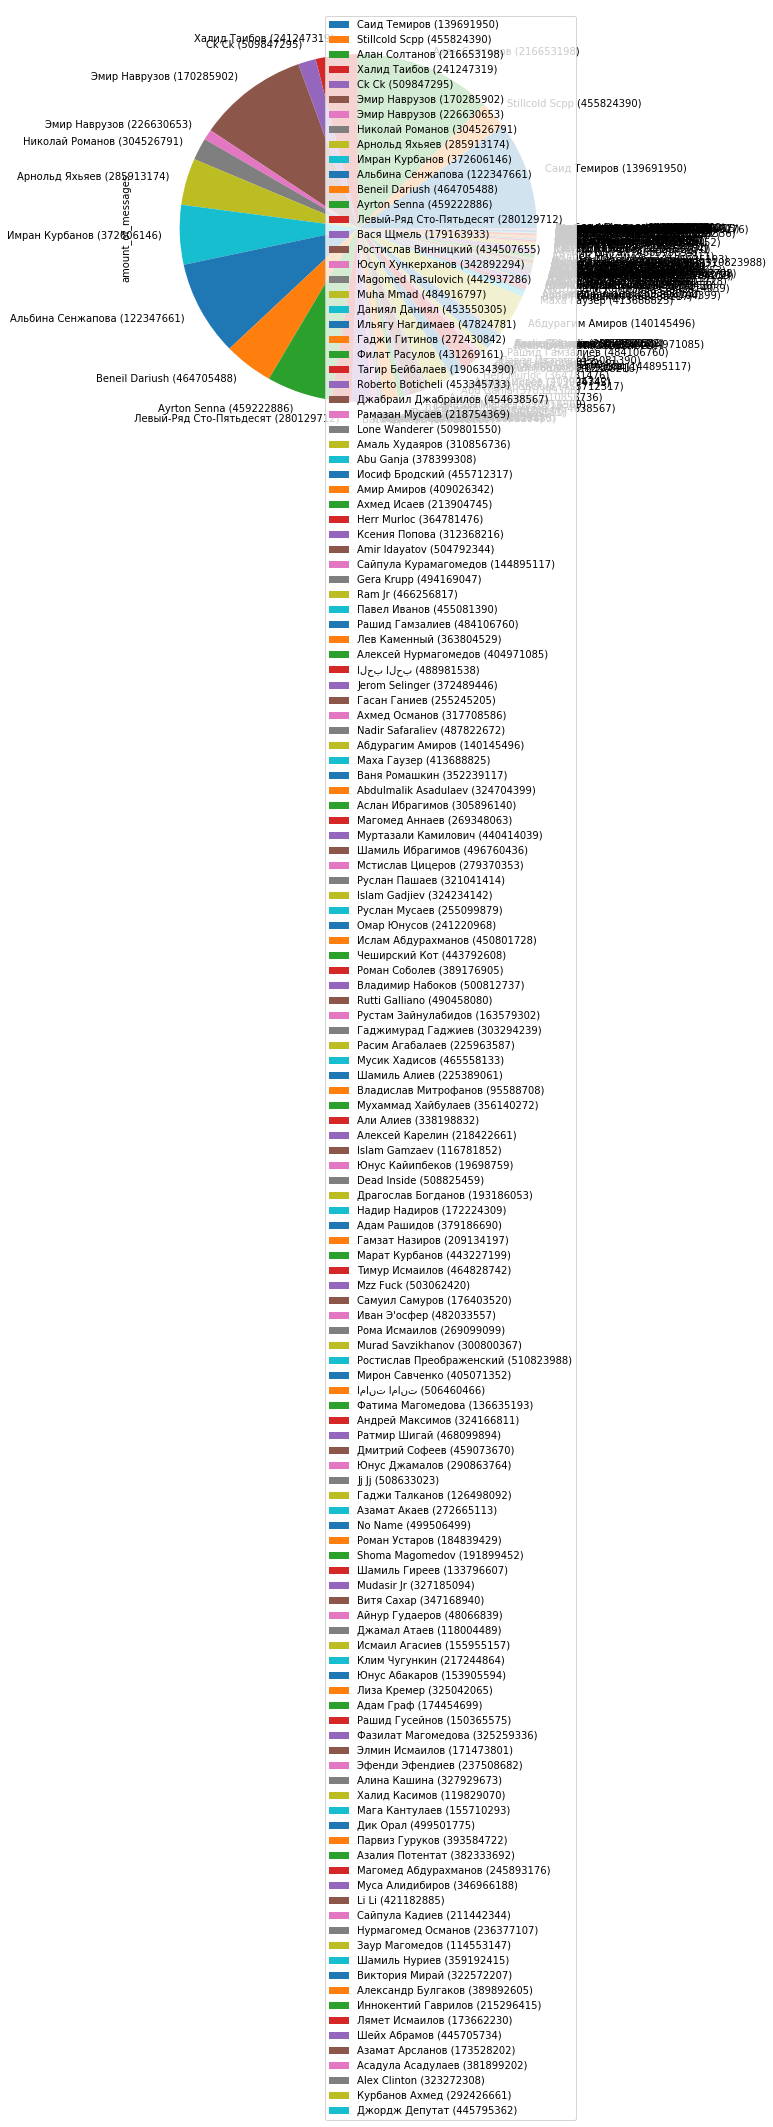

In [43]:
import pandas as pd

df = pd.DataFrame(list(new_ms.values()), index=map(str, list(new_ms.keys())), columns=['amount_of_messages'])

print(df.sort_values(['amount_of_messages'],ascending=False).head(50))

df.plot(kind='pie', subplots=True, figsize=(8, 8))

In [23]:
import re
# http://localhost:8000/#access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456

full_path = 'http://localhost:8000/#access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456'
print(full_path[23:].split('#'))
fragment = {}
for i in full_path[23:].split('&'):
    fragment[i.split('=')[0]] = i.split('=')[1] 
print(fragment)

['access_token=49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414&expires_in=86400&user_id=170285902&state=123456']
{'access_token': '49f3c621d4c8ff0d7d38f4ec32b913839a56dd69dd0636e88ee37ac2639e01d1d0526ba7730ecaa94a414', 'expires_in': '86400', 'user_id': '170285902', 'state': '123456'}
